In [2]:
#%% Importing modules and data
import smtplib
import pandas as pd
import numpy as np
import datetime as dt
# import pandas.stats.moments as st
import statsmodels.api as sm # import statsmodels 
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import quandl as qd
import seaborn as sns
%matplotlib inline

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return

# Changing Directory
os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\SPX Option Backtester\\crypto_testing\\Data')

C:\Users\Fang\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Open,High,Low,Close,Volume,Market Cap,mean,std,upper,lower
Date,,,,,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,164329,-,NaN,NaN,NaN,NaN
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,167911000,NaN,NaN,NaN,NaN
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,42637600,NaN,NaN,NaN,NaN
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,43130000,NaN,NaN,NaN,NaN
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,42796500,NaN,NaN,NaN,NaN
2015-08-12,1.060000,1.290000,0.883608,1.220000,2150620,64018400,NaN,NaN,NaN,NaN
2015-08-13,1.220000,1.970000,1.170000,1.830000,4068680,73935400,NaN,NaN,NaN,NaN
2015-08-14,1.810000,2.260000,1.750000,1.830000,4637030,109594000,NaN,NaN,NaN,NaN
2015-08-15,1.800000,1.880000,1.570000,1.690000,2554360,109160000,NaN,NaN,NaN,NaN


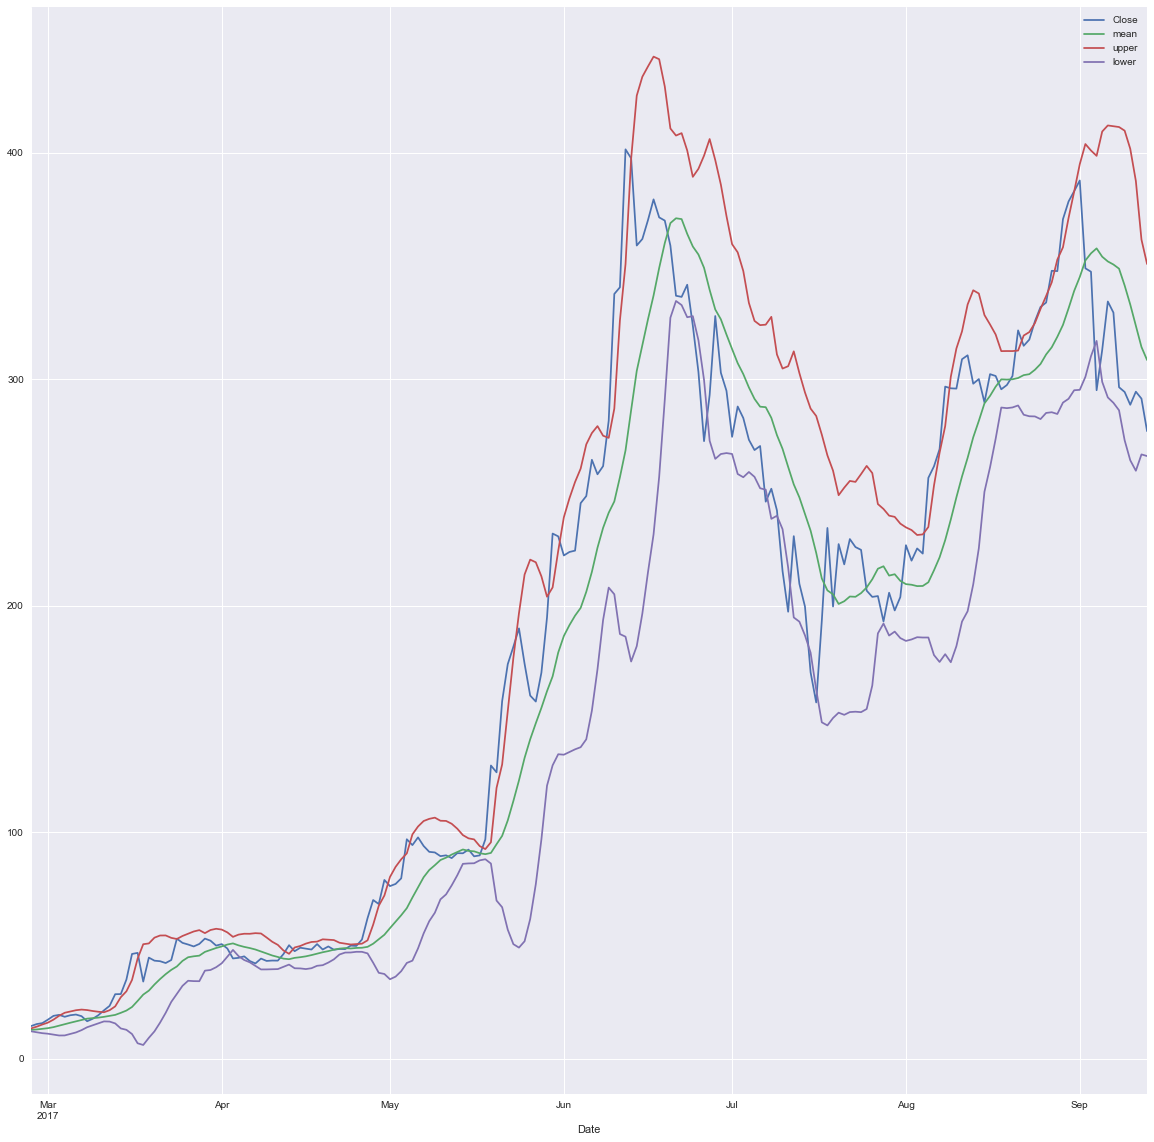

In [29]:
# List of Crypto Data
# BTC ETH XRP BCH LTC DASH NEM Monero IOTA ETC OMG NEO BCC LSK
# Data has Open, High, Low, Close, Volume, Marketcap

crypto = 'ETH'

df = pd.read_excel('cryptodata.xlsx', sheetname = crypto, index_col = 0).sort_index()

periods = 10
bound_width = 2
df['mean'] = df[['Close']].rolling(periods).mean().shift(1)
df['std'] = df['Close'].rolling(periods).std().shift(1)
df['upper'] = df['mean'] + bound_width*df['std']
df['lower'] = df['mean'] - bound_width*df['std']

testdf = df.tail(200)[['Close','mean','upper','lower']]
testdf.plot(figsize = (20,20))
df.head(22)

In [48]:
testdf['holding'] = 0

i = 0
for index, row in testdf.head().iterrows():
    if i == 0:
        if row['Close'] >= row['mean']:
            testdf['holding'][i] = 1
        else:
            testdf['holding'][i] = 0
    else:
        current_holding = testdf['holding'][i - 1]
        if row['Close'] >= row['upper']:
            if current_holding == 1:
                testdf['holding'][i] = 0
        
    i += 1

testdf.head()

0


C:\Users\Fang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Close,mean,upper,lower,holding
Date,,,,,
2017-02-26,14.52,12.859,13.499448,12.218552,1
2017-02-27,15.40,13.021,14.253466,11.788534,0
2017-02-28,15.82,13.293,15.204510,11.381490,0
2017-03-01,17.35,13.594,16.040552,11.147448,0
2017-03-02,19.03,14.053,17.371153,10.734847,0
